In [87]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [88]:
# Load data

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [89]:
# Generate descriptive statistics.

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


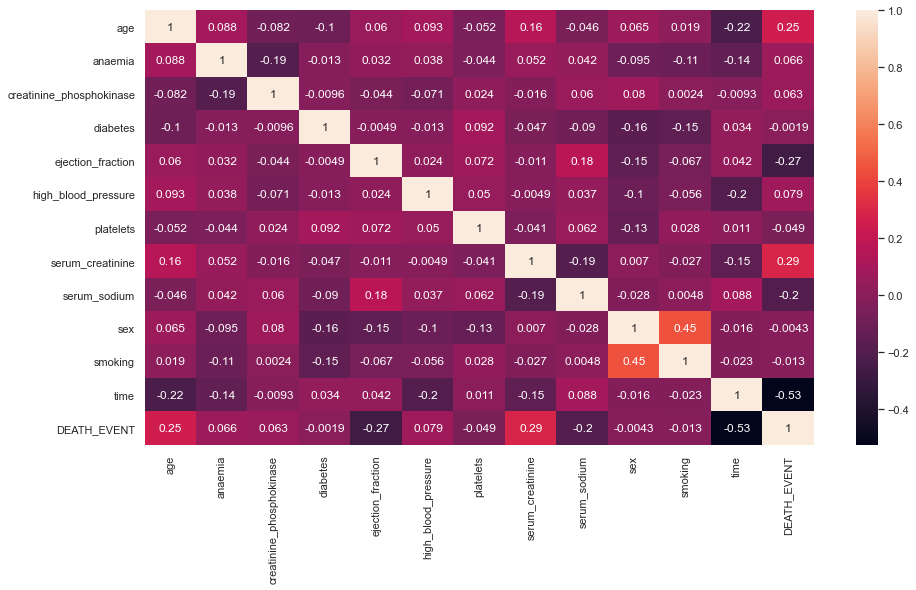

In [90]:
# Compute pairwise correlation of columns, excluding NA/null values.

corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True)
plt.show()

(40.0, 95.0)

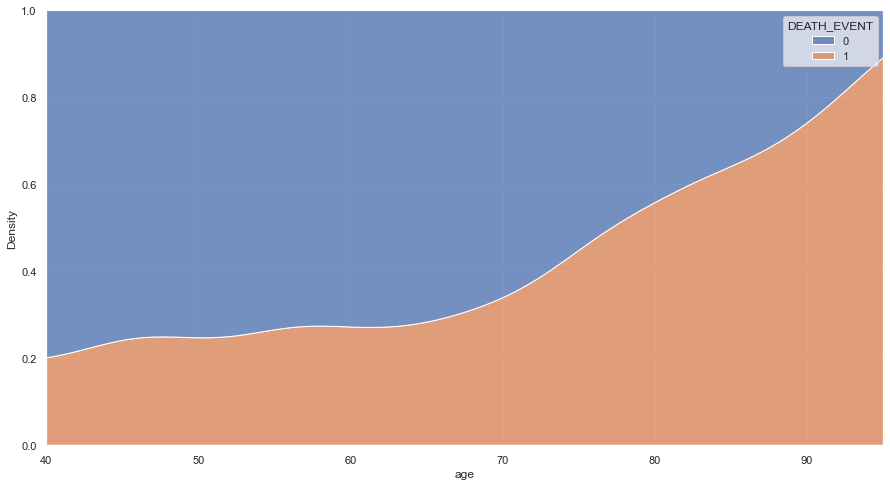

In [91]:
# Create a kernel density estimate (KDE) plot

sns.kdeplot(data=df[['age','DEATH_EVENT']],x='age',hue='DEATH_EVENT',multiple='fill')
plt.xlim(df['age'].min(),df['age'].max())

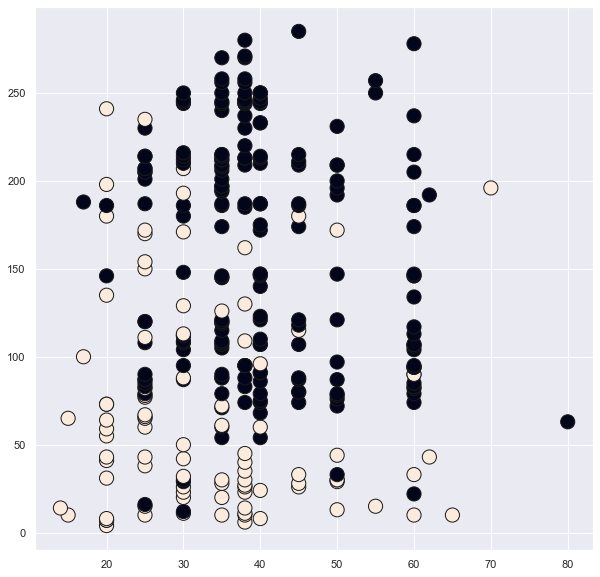

In [92]:
# Create a scatter plot

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['ejection_fraction'], df['time'],
           linewidths=1, alpha=1,
           edgecolor='k',
           s = 200,
           c=df['DEATH_EVENT'])
plt.show()

In [98]:
# Separate the age, serum creatinine, time, ejection fraction (features) and the death event (target)
features = df[['age', 'serum_creatinine', 'time', 'ejection_fraction']]
target = df['DEATH_EVENT']

# Train test split the data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create a logistic regression model
logistic = LogisticRegression()

# Fit the model using the train data
logistic.fit(x_train, y_train)

# Store the predictions for the training and test set
pred_train = logistic.predict(x_train)
pred_test = logistic.predict(x_test)

# Print the test and training accuracy
print("Test Accuracy: ", accuracy_score(y_test, pred_test))
print("Training Accuracy: ", accuracy_score(y_train, pred_train))

Test Accuracy:  0.7888888888888889
Training Accuracy:  0.84688995215311


In [99]:
# Use confusion matrix to tune and validate model

tn, fp, fn, tp = confusion_matrix(y_test, logistic.predict(x_test)).ravel()
(tn+tp)/(tn+tp+fp+fn)

0.7888888888888889

In [100]:
# Create a decision tree classifier

tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(x_train, y_train)

# Store the predictions for the training and test set
pred_train = tree.predict(x_train)
pred_test = tree.predict(x_test)

# Print the test and training accuracy
print("Test Accuracy: ", accuracy_score(y_test, pred_test))
print("Training Accuracy: ", accuracy_score(y_train, pred_train))

Test Accuracy:  0.7666666666666667
Training Accuracy:  0.8803827751196173


In [101]:
# Use confusion matrix to tune and validate model

tn, fp, fn, tp = confusion_matrix(y_test, tree.predict(x_test)).ravel()
(tn+tp)/(tn+tp+fp+fn)

0.7666666666666667